In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
city = "Springfield"
content = "tip"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           1455 non-null   object
 1   business_id       1455 non-null   object
 2   text              1455 non-null   object
 3   date              1455 non-null   object
 4   compliment_count  1455 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 57.0+ KB


In [4]:
df.head()

,user_id,business_id,text,date,compliment_count
0,Oi1qbcz2m2SnwUeztGYcnQ,HFq60sdhRCUcauMDVy3Zdg,Really good sight lines to the TVs from the bar!,2011-10-06 15:17:50,0
1,Pj2Fjzqcdjj0DWYjwpWX5A,LcfXZV38PcTUEnZoM2vzXQ,The drinks are reasonably priced (love the Bah...,2012-08-02 02:27:52,0
2,1E32wgTtwoYj9BVIiCusrw,jcnKA1gG7Tek_UT2zWBI6w,Don't try the Peppermint Chocolate Chip Milk S...,2010-11-27 21:13:08,0
3,mmxQQJHrOuX__httcUWI3Q,LgHYTrrRhajfo4y8jkVQPQ,Check out the old school (circa 1940s?) aerial...,2015-05-18 23:00:13,0
4,Rr4cLb6Go91FT134o6RsKg,Q9sFXUwe6HIlciXXzBUz-A,1st time here,2014-06-11 16:35:57,0


In [5]:
df.duplicated().sum()

0

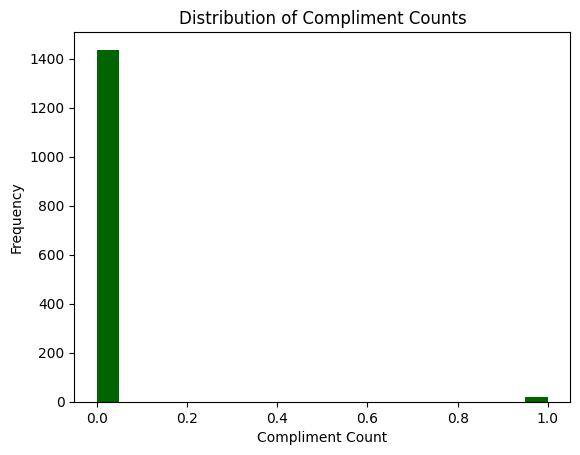

In [6]:
plt.hist(df['compliment_count'], bins=20, color='darkgreen')
plt.title('Distribution of Compliment Counts')
plt.xlabel('Compliment Count')
plt.ylabel('Frequency')
plt.show()

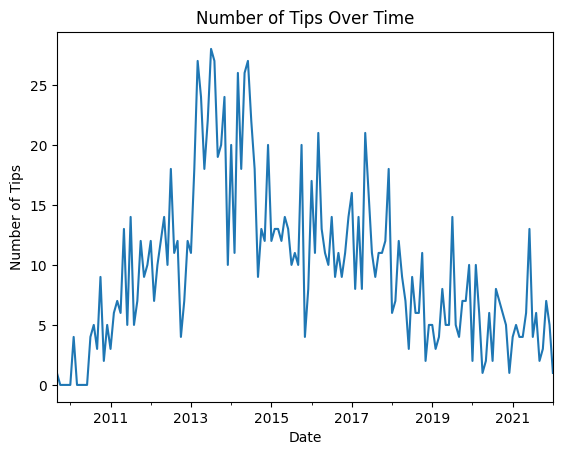

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.resample('ME').size().plot()
plt.title('Number of Tips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tips')
plt.show()